In [1]:
# Importing the libraries
import pandas as pd
import quandl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime
quandl.ApiConfig.api_key = '' # Sign in to quandl.com and get your API key, then paste it here

In [2]:
df = pd.read_csv('MRF.NS.csv', parse_dates = ['Date'], index_col = 'Date')
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-08,55712.0,55712.000000,54402.898438,54776.199219,54776.199219,6867.0
2019-07-09,54893.0,54900.000000,53980.000000,54571.199219,54571.199219,6050.0
2019-07-10,54572.0,55400.000000,54555.601563,55196.898438,55196.898438,5225.0
2019-07-11,55001.0,56528.398438,54696.000000,56163.898438,56163.898438,4222.0
2019-07-12,56148.0,56291.800781,55680.000000,56074.699219,56074.699219,3806.0


In [3]:
short_window = 40
long_window = 100

# Creating an empty dataframe
signals = pd.DataFrame(data = 0, index = df.index, columns = ['Signal'])

# Short and long moving averages
signals['SMA'] = df['Close'].rolling(short_window, min_periods = 1).mean()
signals['LMA'] = df['Close'].rolling(long_window, min_periods = 1).mean()

# Buying and selling signals
signals['Signal'][short_window:] = np.where(signals['SMA'][short_window:] > signals['LMA'][short_window:], 1, 0)
signals['Position'] = signals['Signal'].diff()

signals.head()

/home/kartik/Documents/Python/SMA Crossover Project/smaenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Signal,SMA,LMA,Position
Date,,,,
2002-07-01,0,897.599976,897.599976,NaN
2002-07-02,0,900.625000,900.625000,0.0
2002-07-03,0,902.650004,902.650004,0.0
2002-07-04,0,906.187500,906.187500,0.0
2002-07-05,0,910.409998,910.409998,0.0


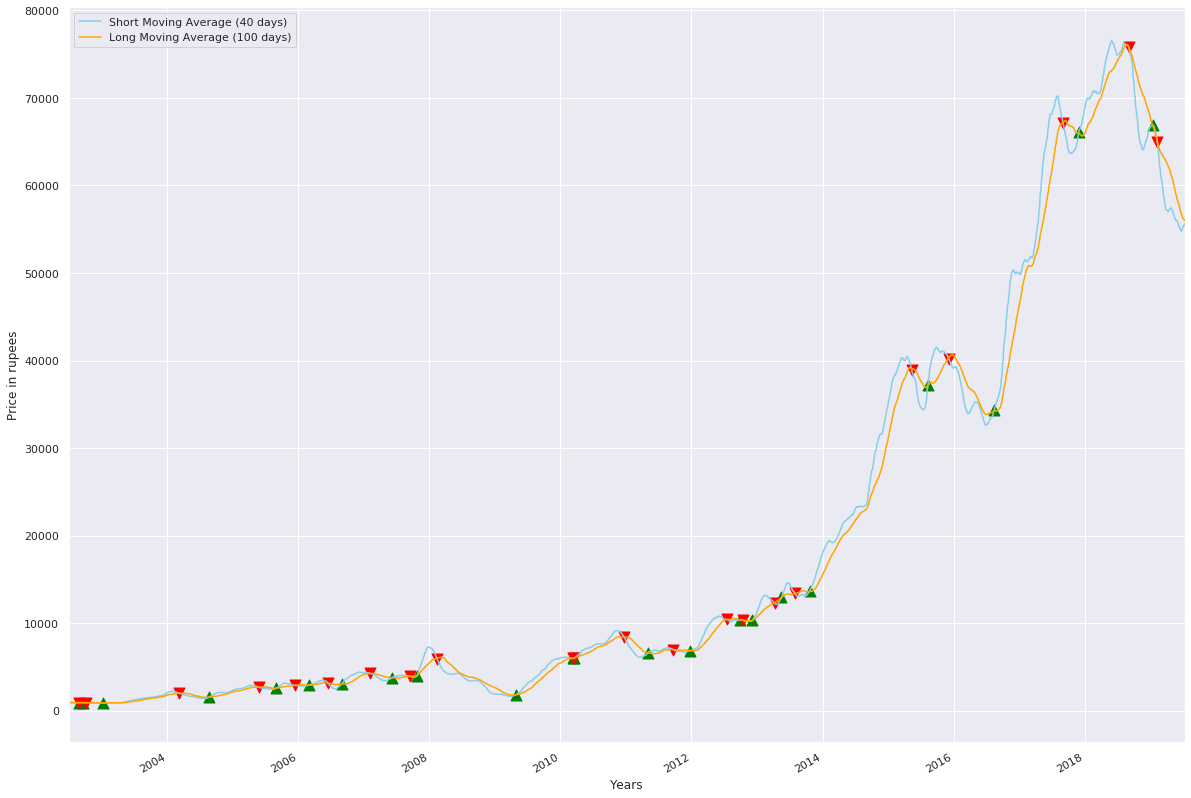

In [4]:
plt.figure(figsize = (20, 15))
# df['Close'].plot(color = 'black')

# Plot the short and long moving averages
signals['SMA'].plot(color = 'skyblue')
signals['LMA'].plot(color = 'orange')

# Plot the buy signals
plt.scatter(x = signals[signals['Position'] == 1].index,
           y = signals[signals['Position'] == 1]['SMA'],
            s = 11 ** 2, marker = '^', color = 'green')

# Plot the sell signals
plt.scatter(x = signals[signals['Position'] == -1].index,
           y = signals[signals['Position'] == -1]['SMA'],
            s = 11 ** 2, marker = 'v', color = 'red')

plt.xlabel('Years')
plt.ylabel('Price in rupees')
plt.legend(labels = [f'Short Moving Average ({short_window} days)',
                     f'Long Moving Average ({long_window} days)'])
plt.show()